In [1]:
import plotly.express as px
import pandas as pd
import numpy as np

In [2]:
data_worldbank = pd.read_csv("./datasets/worldbank_and_press_freedom.csv",index_col=0)
data_responses = pd.read_csv("./datasets/corona_policies_cleaned.csv",index_col =0)
data_cases = pd.read_csv("./datasets/cases_by_day.csv",index_col=0)

In [3]:
firstdays = []
for row in data_cases.iterrows():
    for index, val in enumerate(row[1]):
        if val > 0:
            firstdays.append(int(index))
            break

new_df = pd.DataFrame(index=data_cases.index)
firstday_dates = pd.Series(pd.to_datetime(['22-01-2020'])).repeat(len(new_df))
new_df = new_df.assign(initial_day=firstday_dates.values)
new_df = new_df.assign(days_before_first_case = firstdays)

# Add column with the date of the first case
initial_dates = []
for row in new_df.iterrows():
#     print("row: {}".format(row))
    initial_dates.append(row[1].initial_day + pd.DateOffset(days=row[1].days_before_first_case))
new_df = new_df.assign(first_case_date = initial_dates)

In [4]:
data_responses = data_responses.drop(columns= ['COMMENTS','NON_COMPLIANCE','SOURCE','SOURCE_TYPE','LINK', 'Alternative source', 'ENTRY_DATE'])
data_responses = data_responses.dropna(subset=['DATE_IMPLEMENTED'])
data_responses['DATE_IMPLEMENTED']=pd.to_datetime(data_responses.DATE_IMPLEMENTED,format='%d/%m/%Y')

In [58]:
first_ever_measure_dates = {}
first_ever_measure_types = {}
for iso in data_responses.ISO.unique():
    subset = data_responses[data_responses.ISO == iso]
    first_ever_measure_dates.update({iso: subset.DATE_IMPLEMENTED.min()})
    first_ever_measure_types.update({iso: subset.loc[subset.DATE_IMPLEMENTED.idxmin()].CATEGORY})


In [59]:
new_df["first_measure_date"] = np.nan
new_df["first_measure_type"] = np.nan

for iso in first_ever_measure_dates:
    try:
        new_df.loc[iso, 'first_measure_date'] = first_ever_measure_dates[iso]
    except KeyError:
        print('Error: ISO code {} not present in dataframe.'.format(iso))
    
for iso in first_ever_measure_types:
    try:
        measure_type = first_ever_measure_types[iso]
        
        new_df.loc[iso, 'first_measure_type'] = str(first_ever_measure_types[iso])
    except KeyError:
        print('Error: ISO code {} not present in dataframe.'.format(iso))

In [60]:
no_nans = new_df.dropna()

In [61]:
no_nans['first_measure_date'] = pd.to_datetime(no_nans.first_measure_date)

/Users/ldorigo/anaconda3/envs/dataviz/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
time_before_first_measure = no_nans['first_measure_date'] - no_nans['first_case_date']
no_nans = no_nans.assign(time_before_first_measure = time_before_first_measure.dt.days)

In [63]:
no_nans

,initial_day,days_before_first_case,first_case_date,first_measure_date,first_measure_type,time_before_first_measure
country_code,,,,,,
AFG,2020-01-22,33.0,2020-02-24,2020-02-01,Movement restrictions,-23
AGO,2020-01-22,58.0,2020-03-20,2020-02-06,Public health measures,-43
ALB,2020-01-22,47.0,2020-03-09,2020-03-09,Movement restrictions,0
ARE,2020-01-22,7.0,2020-01-29,2020-01-02,Movement restrictions,-27
ARG,2020-01-22,41.0,2020-03-03,2020-02-17,Public health measures,-15
...,...,...,...,...,...,...
VEN,2020-01-22,52.0,2020-03-14,2020-03-15,Movement restrictions,1
VNM,2020-01-22,1.0,2020-01-23,2020-03-02,Movement restrictions,39
ZAF,2020-01-22,43.0,2020-03-05,2020-03-10,Social and economic measures,5


In [64]:
full_data = no_nans.merge(data_worldbank, left_index=True, how='left',right_on= "country_code")

In [65]:
fig = px.scatter(data_frame=full_data,y = "time_before_first_measure",x ='days_before_first_case', hover_name=full_data.index, color=  'first_measure_type')

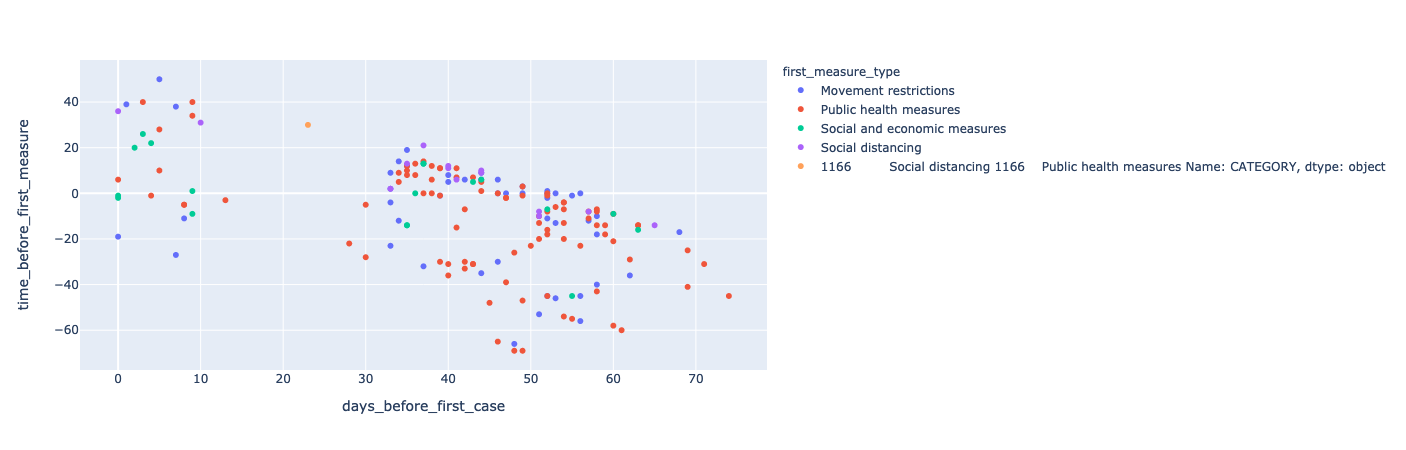

In [66]:
fig.show()

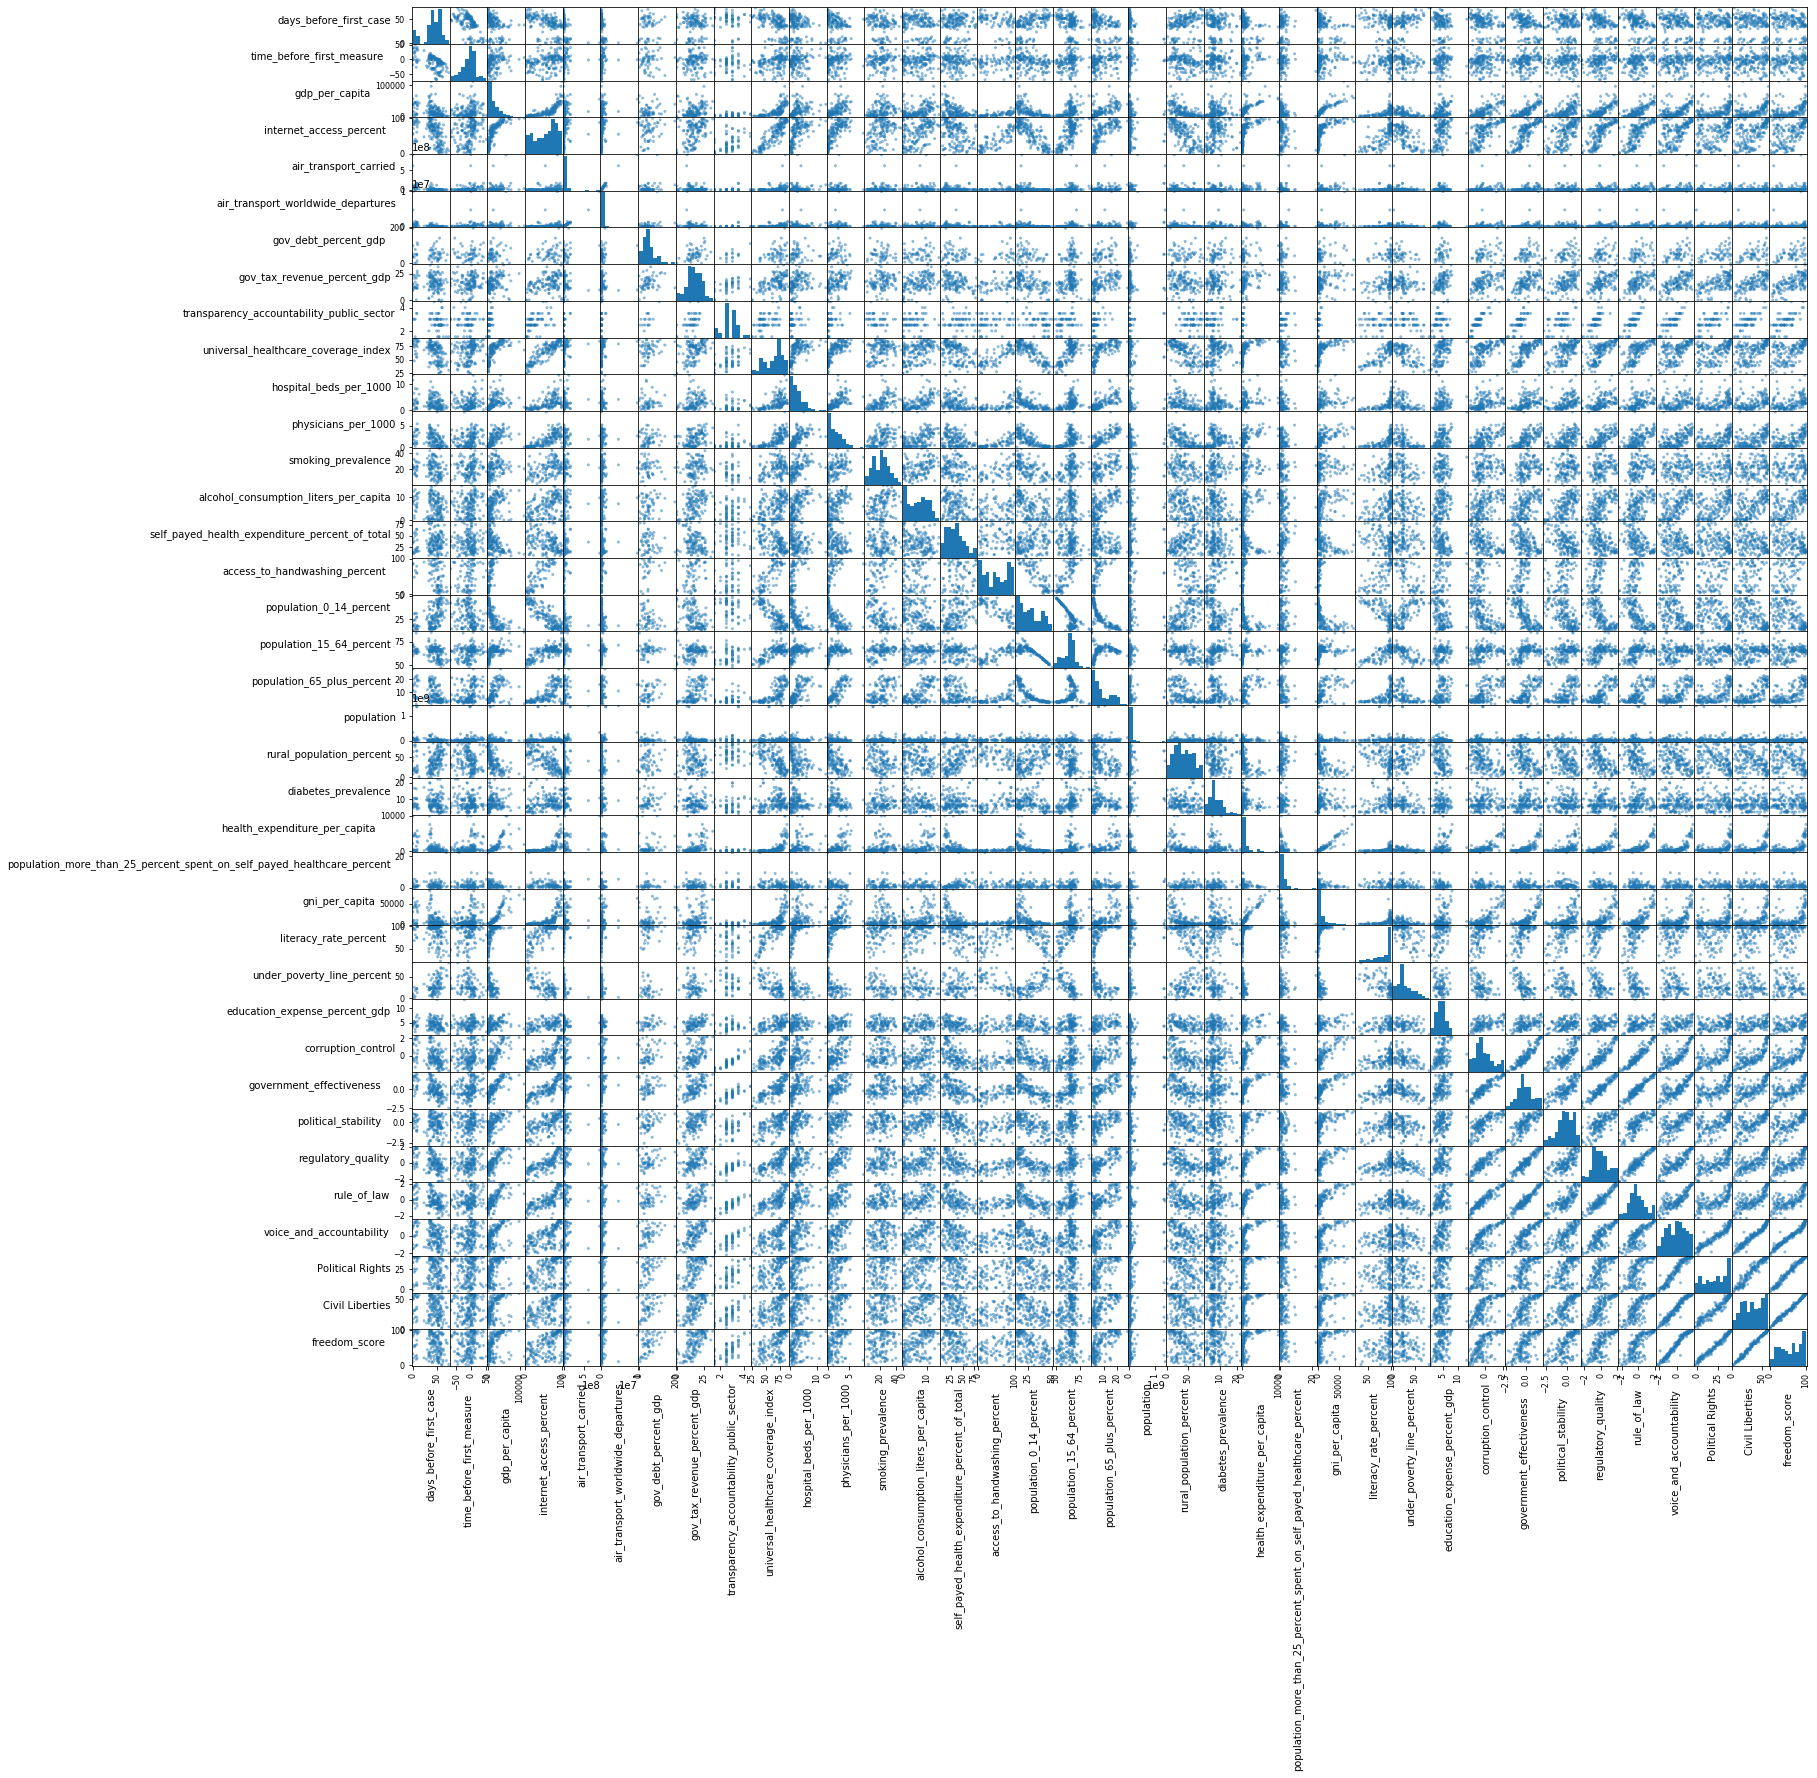

In [50]:
axes = pd.plotting.scatter_matrix(full_data, figsize = (25,25))fig = axes[0,0].figure
for t in fig.axes:
    t.xaxis.label.set_rotation(90)
    t.yaxis.label.set_rotation(0)
    t.yaxis.label.set_ha('right')
fig

In [67]:
full_data.join 

,initial_day,days_before_first_case,first_case_date,first_measure_date,first_measure_type,time_before_first_measure,country_code,gdp_per_capita,internet_access_percent,air_transport_carried,...,corruption_control,government_effectiveness,political_stability,regulatory_quality,rule_of_law,voice_and_accountability,Political Rights,Civil Liberties,freedom_category,freedom_score
Afghanistan,2020-01-22,33.0,2020-02-24,2020-02-01,Movement restrictions,-23,AFG,1734.723214,13.500000,1.722613e+06,...,-1.496648,-1.457285,-2.746730,-1.132634,-1.668478,-0.994720,13,14,Not Free,27
Angola,2020-01-22,58.0,2020-03-20,2020-02-06,Public health measures,-43,AGO,5725.327238,14.339079,1.516628e+06,...,-1.144541,-1.052086,-0.319035,-0.999813,-1.048023,-0.919594,11,21,Not Free,32
Albania,2020-01-22,47.0,2020-03-09,2020-03-09,Movement restrictions,0,ALB,12316.071501,71.847041,3.031370e+05,...,-0.521867,0.114788,0.382100,0.281710,-0.392243,0.206370,27,40,Partly Free,67
United Arab Emirates,2020-01-22,7.0,2020-01-29,2020-01-02,Movement restrictions,-27,ARE,66616.050283,98.450002,9.553307e+07,...,1.151608,1.431291,0.743238,0.931617,0.806448,-1.109334,5,12,Not Free,17
Argentina,2020-01-22,41.0,2020-03-03,2020-02-17,Public health measures,-15,ARG,18288.244599,74.294907,1.808194e+07,...,-0.083468,0.025988,0.019932,-0.243070,-0.240008,0.565302,35,50,Free,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,2020-01-22,52.0,2020-03-14,2020-03-15,Movement restrictions,1,VEN,9401.622748,72.000000,2.137771e+06,...,-1.467512,-1.581517,-1.343512,-2.334370,-2.338622,-1.414395,2,14,Not Free,16
Vietnam,2020-01-22,1.0,2020-01-23,2020-03-02,Movement restrictions,39,VNM,6608.621686,70.349636,4.704967e+07,...,-0.485357,-0.003445,0.203266,-0.385852,-0.003282,-1.445501,3,17,Not Free,20
South Africa,2020-01-22,43.0,2020-03-05,2020-03-10,Social and economic measures,5,ZAF,12144.694205,56.167394,2.392175e+07,...,-0.021569,0.340379,-0.276673,0.171912,-0.102496,0.657390,33,46,Free,79
Zambia,2020-01-22,56.0,2020-03-18,2020-02-24,Public health measures,-23,ZMB,3747.972455,14.299997,8.904000e+03,...,-0.656137,-0.559209,0.141994,-0.442611,-0.344939,-0.320463,22,32,Partly Free,54


In [68]:
no_nans

,initial_day,days_before_first_case,first_case_date,first_measure_date,first_measure_type,time_before_first_measure
country_code,,,,,,
AFG,2020-01-22,33.0,2020-02-24,2020-02-01,Movement restrictions,-23
AGO,2020-01-22,58.0,2020-03-20,2020-02-06,Public health measures,-43
ALB,2020-01-22,47.0,2020-03-09,2020-03-09,Movement restrictions,0
ARE,2020-01-22,7.0,2020-01-29,2020-01-02,Movement restrictions,-27
ARG,2020-01-22,41.0,2020-03-03,2020-02-17,Public health measures,-15
...,...,...,...,...,...,...
VEN,2020-01-22,52.0,2020-03-14,2020-03-15,Movement restrictions,1
VNM,2020-01-22,1.0,2020-01-23,2020-03-02,Movement restrictions,39
ZAF,2020-01-22,43.0,2020-03-05,2020-03-10,Social and economic measures,5


In [7]:
data_responses

,COUNTRY,ISO,REGION,CATEGORY,MEASURE,TARGETED_POP_GROUP,DATE_IMPLEMENTED
1,Afghanistan,AFG,Asia,Public health measures,Health screenings in airports and border cross...,No,2020-02-12
2,Afghanistan,AFG,Asia,Public health measures,Introduction of quarantine policies,No,2020-02-12
3,Afghanistan,AFG,Asia,Public health measures,Awareness campaigns,No,2020-02-12
4,Afghanistan,AFG,Asia,Social and economic measures,Emergency administrative structures activated ...,No,2020-02-12
5,Afghanistan,AFG,Asia,Social distancing,Limit public gatherings,No,2020-03-12
...,...,...,...,...,...,...,...
1959,Zimbabwe,ZWE,Africa,Social distancing,Limit public gatherings,No,2020-03-24
1960,Zimbabwe,ZWE,Africa,Public health measures,Introduction of quarantine policies,No,2020-03-24
1961,Zimbabwe,ZWE,Africa,Public health measures,Health screenings in airports and border cross...,No,2020-03-24
1962,Zimbabwe,ZWE,Africa,Social distancing,Schools closure,No,2020-03-24


In [11]:
cases_and_measures = new_df.merge(data_responses,left_index=True,right_on = 'ISO',how='right' )

In [30]:
cases_and_measures = cases_and_measures.dropna()

In [70]:
unique_measures= list(cases_and_measures.MEASURE.unique())
unique_measures.sort()
unique_measures

['Additional health/documents requirements upon arrival',
 'Amendments to funeral and burial regulations',
 'Awareness campaigns',
 'Border checks',
 'Border closure',
 'Changes in prison-related policies',
 'Checkpoints within the country',
 'Complete border closure',
 'Curfews',
 'Domestic travel restrictions',
 'Economic measures',
 'Emergency administrative structures activated or established',
 'Full lockdown',
 'General recommendations',
 'Health screenings in airports and border crossings',
 'Humanitarian exemptions',
 'International flights suspension',
 'Introduction of quarantine policies',
 'Limit product imports/exports',
 'Limit public gatherings',
 'Lockdown of refugee/idp camps or other minorities',
 'Mass population testing',
 'Military deployment',
 'Partial lockdown',
 'Psychological assistance and medical social work',
 'Public services closure',
 'Schools closure',
 'State of emergency declared',
 'Strengthening the public health system',
 'Surveillance and monitori

In [106]:
cases_and_measures.loc[:,'MEASURE'] = cases_and_measures.loc[:,'MEASURE'].apply(lambda x: x.replace('\xa0',''))
cases_and_measures = cases_and_measures.assign( implementation_after_pandemic = (cases_and_measures.DATE_IMPLEMENTED - cases_and_measures.initial_day).dt.days)
cases_and_measures = cases_and_measures.assign( implementation_after_case_in_country = (cases_and_measures.DATE_IMPLEMENTED - cases_and_measures.first_case_date).dt.days)

In [107]:
full_data = cases_and_measures.merge(data_worldbank, left_on='ISO', right_on='country_code', how='left')

In [108]:
fig =  px.scatter(full_data, color='CATEGORY', x = 'implementation_after_pandemic', y ='freedom_score', hover_name='COUNTRY',hover_data = ['MEASURE'] )

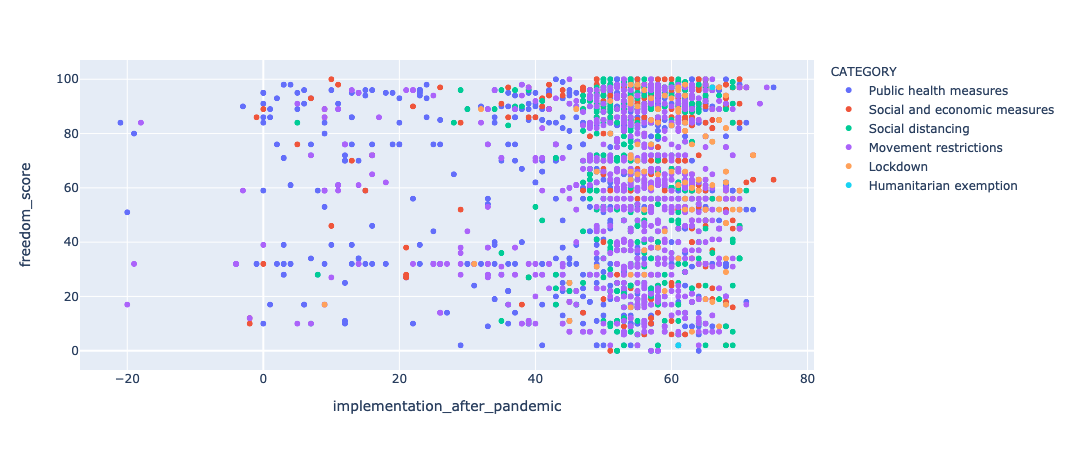

In [109]:
fig.show()

# First plot: Let's see how several factors influence the time before lockdown

In [111]:
codes = full_data.country_code.unique()
lockdowns= full_data[full_data.CATEGORY == 'Lockdown']
lockdowns = lockdowns.sort_values(by='DATE_IMPLEMENTED')
lockdowns_unique = lockdowns.drop_duplicates(subset = ['ISO'],keep='first')

In [114]:
px.scatter(data_frame=lockdowns_unique,x = lockdowns_unique.implementation_after_case_in_country,y ='gdp_per_capita',size= "universal_healthcare_coverage_index", color='freedom_score',hover_name='COUNTRY')

/Users/ldorigo/anaconda3/envs/dataviz/lib/python3.6/site-packages/_plotly_utils/basevalidators.py:751: RuntimeWarning:

invalid value encountered in greater_equal

/Users/ldorigo/anaconda3/envs/dataviz/lib/python3.6/site-packages/_plotly_utils/basevalidators.py:751: RuntimeWarning:

invalid value encountered in less_equal



ValueError: 
    Invalid element(s) received for the 'size' property of scatter.marker
        Invalid elements include: [nan]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above